# Import Library

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Data Set and Early Exploration

In [9]:
#Import Data Set 
df = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
#First 5 Row of The Data set
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
#Data Set Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Preprocessing Data Set 

## Check and Clean for Missing Value

In [8]:
((df.isnull().sum()/len(df))*100) #Check for Missing Values

lsoa_code         0.0
borough           0.0
major_category    0.0
minor_category    0.0
value             0.0
year              0.0
month             0.0
dtype: float64

**Conclusion :** No missing values in the data set

## Check for Duplicated Rows 

In [9]:
df.duplicated().sum()

0

**Conclusion :** No duplicated row in the data set

# EDA With Visualization

In [22]:
# Data Set Time line
np.sort(df['year'].unique())

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

The data set was taken from 2008 to 2016

## Top Crime Category from 2008 to 2016

Text(0, 0.5, 'Crime Category')

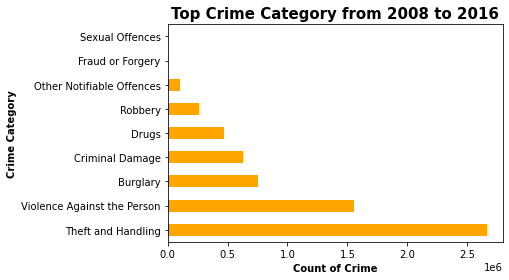

In [31]:
df.groupby('major_category')['value'].sum().sort_values(ascending=False).plot(kind='barh', color='orange') #Group by aggregation
plt.title('Top Crime Category from 2008 to 2016', fontweight="bold", fontsize=15) #Set title and Fontsize
plt.xlabel('Count of Crime', fontweight="bold") #Set X axis title 
plt.ylabel('Crime Category', fontweight="bold") #Set Y axis title

**Conclusion :** Theft and Handling is the most common crime action in london

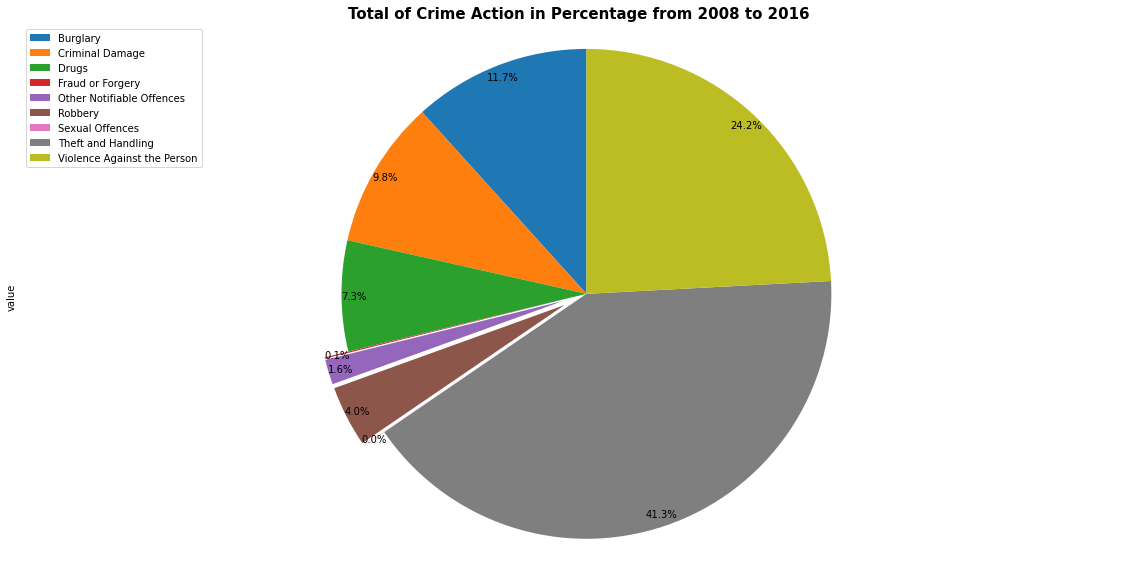

In [125]:
# Percentage of Crime Category from 2008 to 2016
df_crime_percentage = df.groupby('major_category')['value'].sum(
).to_frame()  # Sum of crime incidents by major category
explode_list = [0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0, 0] #ratio for offset wedge
(df_crime_percentage['value']).plot(
    kind='pie', autopct='%1.1f%%', figsize=(20, 10), startangle=90, shadow=False, pctdistance=0.95, labels=None, explode=explode_list) #Create Pie Plot
plt.axis('equal')
plt.legend(labels=df_crime_percentage.index, loc='upper left')
plt.title('Total of Crime Action in Percentage from 2008 to 2016',
          fontweight="bold", fontsize=15)
plt.show()

**Conclusion :** Theft and Handling is the most often crime category to be happened in London

## Crime Rate for Each Year

Text(0, 0.5, 'Number of Crime Incidents')

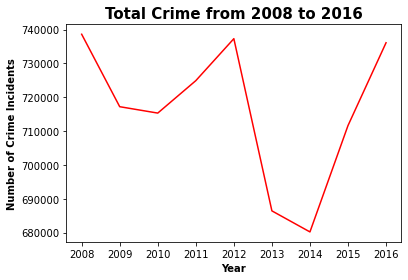

In [35]:
df.groupby('year')['value'].sum().plot(kind='line', color='red') #Group by aggregation in total
plt.title('Total Crime from 2008 to 2016', fontweight="bold", fontsize=15) #Set title and Fontsize
plt.xlabel('Year', fontweight="bold") #Set X axis title
plt.ylabel('Number of Crime Incidents', fontweight="bold") #Set Y axis title

**Conclusion :** There is an increasement of crime action since 2014 and it is continued to 2016. This could be cause by financial crisis that is hitting UK in 2014.

## Top 5 Borough with Most Crime and its Rate for 8 years (2008 to 2016)

Text(0, 0.5, 'Borough')

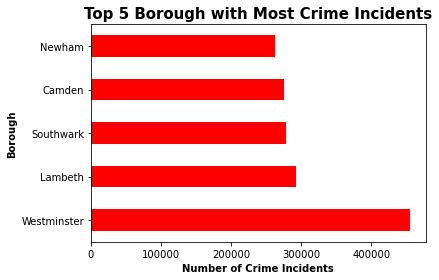

In [178]:
#Top 5 Borough with Most Crime 
df.groupby('borough')['value'].sum().sort_values(ascending=False).head(5).plot(kind='barh', color='red')

top5_b = df.groupby('borough')['value'].sum().sort_values(ascending=False).head(5).to_frame().reset_index()
plt.title('Top 5 Borough with Most Crime Incidents', fontweight="bold", fontsize=15) #Set title and Fontsize
plt.xlabel('Number of Crime Incidents', fontweight="bold") #Set X axis title
plt.ylabel('Borough', fontweight="bold") #Set Y axis title

In [183]:
top5_borough = top5_b['borough'].unique().tolist()
df_rate_top5 = df.loc[df['borough'].isin(top5_borough)]
df_rate_top5.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
11,E01003076,Lambeth,Violence Against the Person,Other violence,0,2015,4
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
39,E01003947,Southwark,Drugs,Possession Of Drugs,0,2015,3


Text(0, 0.5, 'Numer of Incidents')

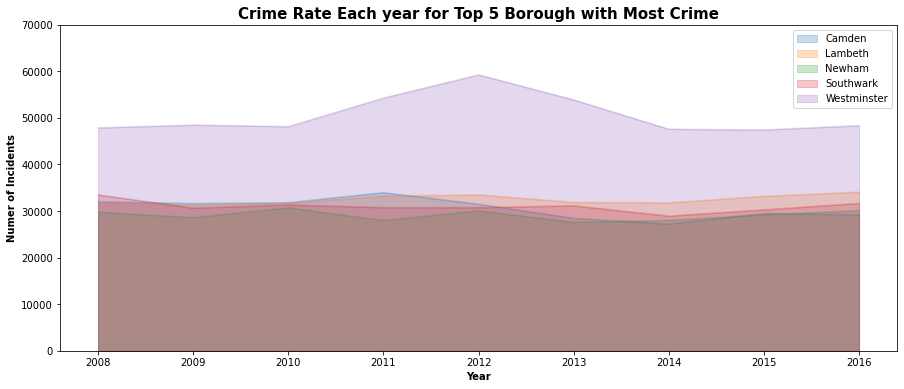

In [214]:
#Crime Rate Each year for Top 10 Borough with Most Crime
df_group = df_rate_top5[['borough', 'year', 'value']]
df_borough_year = df_group.groupby(['borough', 'year'])['value'].sum().to_frame().reset_index()
df_borough_year.set_index('year').groupby('borough')['value'].plot(kind='area', stacked=True, alpha=0.25, figsize=(15,6))
plt.legend()
plt.ylim(0,70000)
plt.title('Crime Rate Each year for Top 5 Borough with Most Crime', fontweight="bold", fontsize=15)
plt.xlabel('Year', fontweight="bold")
plt.ylabel('Numer of Incidents', fontweight="bold")

<function matplotlib.pyplot.show(close=None, block=None)>

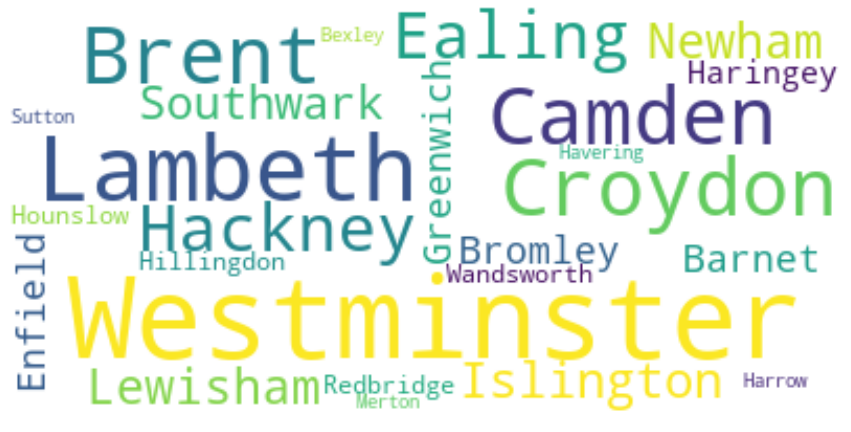

In [23]:
#Top Borough with Most Crime in Wordclouds 
from wordcloud import WordCloud, STOPWORDS
borough_crime = df.groupby('borough')['value'].sum().to_frame()
total_crime = borough_crime['value'].sum()
max_words = 90 
word_string = ''
for borough in borough_crime.index.values: 
    if len(borough.split(' ')) == 1: 
        repeat = int(borough_crime.loc[borough, 'value']/float(total_crime)*max_words)
        word_string = word_string + ((borough + ' ') * repeat)

wordcloud = WordCloud(background_color='white').generate(word_string)
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show
    

**Conclusion :** Westminster is the borough who has got the most crime incidents in 8 years

## Month and Crime Incidents Correlation in 2016

Text(0, 0.5, 'Number of Crime Incidents')

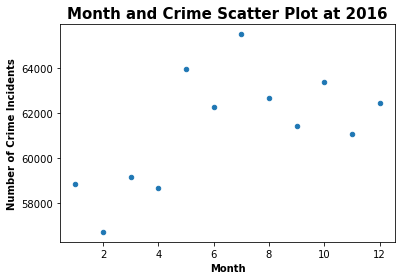

In [89]:
# Take data from 2016
data_2016 = df[df['year'] == 2016]
data_2016.groupby('month')['value'].sum().to_frame().reset_index().plot(kind='scatter', x='month', y='value')
plt.title('Month and Crime Scatter Plot at 2016', fontweight="bold", fontsize=15) #Set title and Fontsize
plt.xlabel('Month', fontweight="bold") #Set X axis title
plt.ylabel('Number of Crime Incidents', fontweight="bold") #Set Y axis title

**Conclusion :** from the graph it could be seen that month and crime incident has a relatively postive correlation. This means that approaching 2016 end of year, the crime rate increases.

## Crime Incident Distribution Accross All Borough in 2016

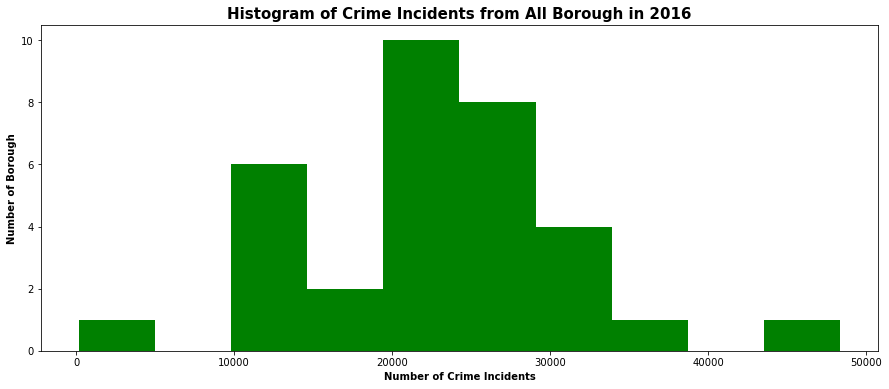

In [27]:
df_2016 = df[df['year'] == 2016] #Year 2016 Data
df_2016.groupby('borough')['value'].sum().plot(kind='hist', figsize=(15,6), color='green')#Group By Value for Total Crime Incidents
plt.title('Histogram of Crime Incidents from All Borough in 2016', fontweight="bold", fontsize=15)
plt.xlabel('Number of Crime Incidents', fontweight="bold")
plt.ylabel('Number of Borough', fontweight="bold")
plt.show()

**Conclusion :** Most of the borough has a crime incidents around 25000 incidents in 2016

## Boxplot of Westminster Total Crime Incidents from 2008 to 2016

In [279]:
#Westminster Data 
west_data = df[df['borough'] == 'Westminster']
west_data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
74,E01032513,Westminster,Violence Against the Person,Wounding/GBH,0,2009,9
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
165,E01004677,Westminster,Theft and Handling,Other Theft Person,0,2015,10


Text(0, 0.5, 'Number of Crime Incidents')

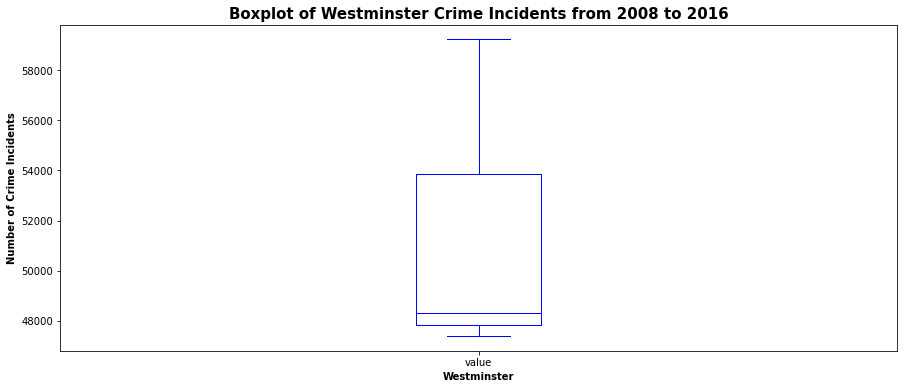

In [282]:
west_data.groupby('year')['value'].sum().plot(kind='box', figsize=(15,6), color='blue') #Data for Each year Crime Incident
plt.title('Boxplot of Westminster Crime Incidents from 2008 to 2016', fontweight="bold", fontsize=15) #Set title and Fontsize
plt.xlabel('Westminster', fontweight="bold") #Set X axis title
plt.ylabel('Number of Crime Incidents', fontweight="bold") #Set Y axis title

**Conclusion :** There is no outliers for the number of incidents data from 2008 to 2016 especially in Westminster

## Crime Incidents Visualization in London Map

## Crime Rate in London

In [59]:
import folium #Import folium Library 

london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=15)
london_map

In [32]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 

london_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df[['borough', 'value']],
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)
london_map

C:\Users\andon\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Borough with Crime Incidents

In [53]:
#Incidents Data 
df_incidents = df[df['value'] > 0]
df_incidents['borough'].unique() #List of Borough That is Having a Crime Incidents

array(['Sutton', 'Barking and Dagenham', 'Ealing', 'Hackney', 'Bromley',
       'Newham', 'Croydon', 'Bexley', 'Hounslow', 'Kingston upon Thames',
       'Southwark', 'Lambeth', 'Haringey', 'Barnet', 'Havering',
       'Waltham Forest', 'Brent', 'Westminster', 'Camden',
       'Kensington and Chelsea', 'Tower Hamlets', 'Richmond upon Thames',
       'Hillingdon', 'Lewisham', 'Redbridge', 'Islington', 'Harrow',
       'Merton', 'Wandsworth', 'Hammersmith and Fulham', 'Enfield',
       'Greenwich', 'City of London'], dtype=object)

In [58]:
#Borough Latitude and Longitude Data 
borough_coor = pd.read_csv('Borough Lat and Long.csv') 
borough_coor.head(40)

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.546483,0.129350
1,Barnet,51.656923,-0.194925
2,Bexley,51.456600,0.105600
3,Brent,51.567281,-0.271057
4,Bromley,51.407421,0.013062
5,Camden,51.536388,-0.140556
6,City of London,51.512344,-0.090985
7,Croydon,51.376495,-0.100594
8,Ealing,51.500000,-0.333300
9,Enfield,51.654827,-0.083599


In [62]:
#Create Visualization 
london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=15)

incidents = folium.map.FeatureGroup()
for lat, lng in zip(borough_coor['Latitude'], borough_coor['Longitude']): 
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng], 
    radius=5,
    color='red',
    fill=True, 
    fill_color='black',
    fill_opacity = 0.6)
    )
    
print('\033[1m' + 'Warning :' + '\033[0m' + 'Try to Avoid walking at this Location at Night!!')
london_map.add_child(incidents)